<a href="https://colab.research.google.com/github/endnef2/big_leader/blob/main/CV/CLAHE%2C_high_pass_filter_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. CLAHE

In [13]:
# 이미지 경로 지정
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image1.jpg'

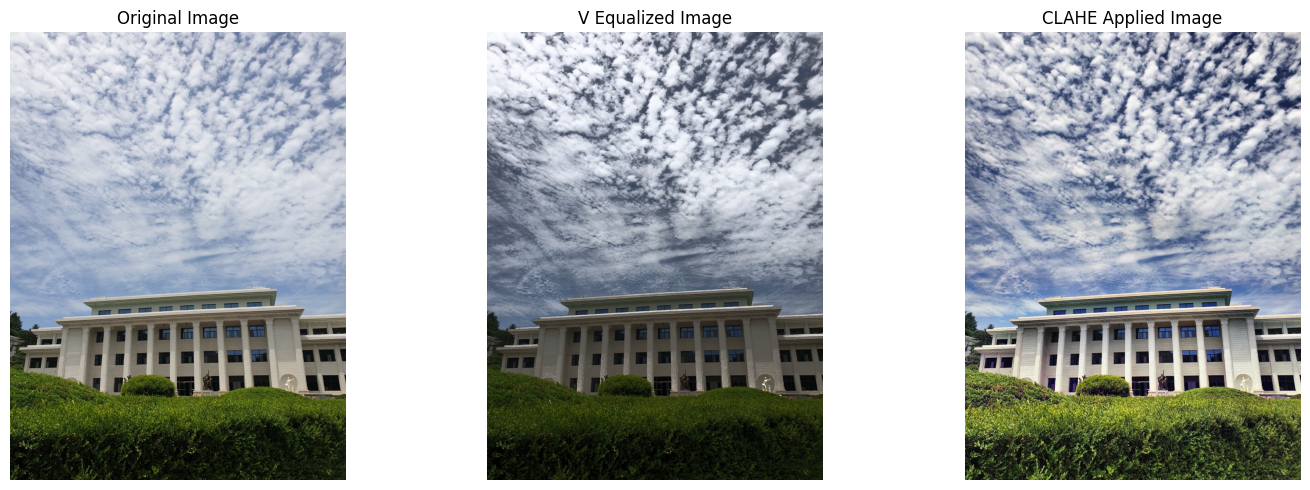

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# V 평활화
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
v_eq = cv2.equalizeHist(v)
image_v_eq = cv2.merge([h, s, v_eq])
image_v_eq_rgb = cv2.cvtColor(image_v_eq, cv2.COLOR_HSV2RGB)

# CLAHE 적용
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
channels = cv2.split(img_rgb)
clahe_channels = [clahe.apply(ch) for ch in channels]
image_clahe_rgb = cv2.merge(clahe_channels)

# 이미지 표시
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_v_eq_rgb)
plt.title('V Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_clahe_rgb)
plt.title('CLAHE Applied Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
# 이미지 경로 지정
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image18.jpg'

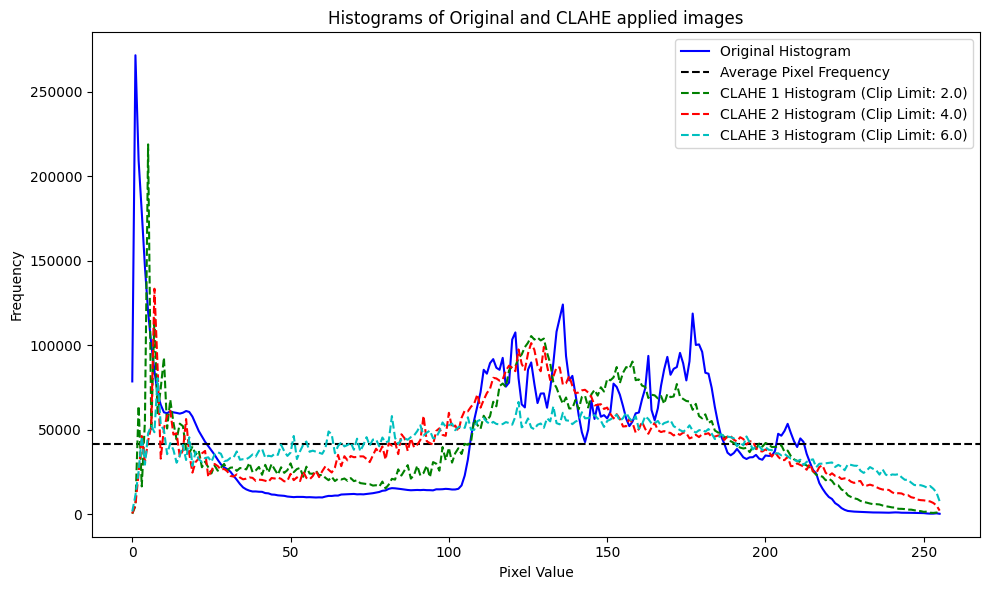

In [23]:
# 이미지 다시 불러오기
img = cv2.imread(image_path)
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 원본 이미지의 histogram 계산
hist_original, _ = np.histogram(image_gray.flatten(), 256, [0,256])

# 평균 빈도 수평선 계산
average_pixel_frequency = image_gray.size / 256

# 그래프 초기화 및 다시 그리기
plt.figure(figsize=(10, 6))

# 원본 이미지의 Histogram
plt.plot(hist_original, color='b', label='Original Histogram')
plt.axhline(y=average_pixel_frequency, color='k', linestyle='--', label='Average Pixel Frequency')

# 지정된 횟수만큼 CLAHE 적용하며 히스토그램 그리기
for idx in range(repeat_times):
    image_gray = clahe.apply(image_gray)  # 이전 결과에 대해 계속 적용
    hist_clahe, _ = np.histogram(image_gray.flatten(), 256, [0,256])
    plt.plot(hist_clahe, color=colors[idx], linestyle='dashed', label=f'CLAHE {idx+1} Histogram (Clip Limit: {clip_limit*(idx+1)})')

plt.legend(loc='upper right')
plt.title('Histograms of Original and CLAHE applied images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#2.high-pass filter

In [18]:
# 이미지 경로 지정
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image15.jpg'

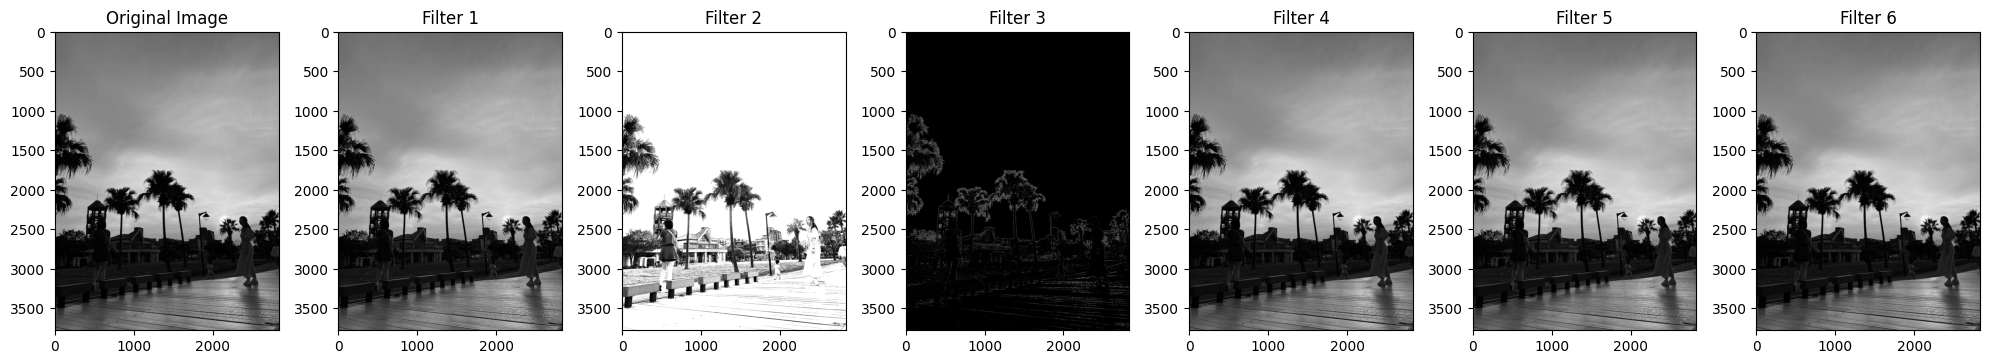

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 필터
filters = [
    np.array([
        [0, 0, -1, 0, 0],
        [0, 0, -1, 0, 0],
        [-1, -1, 9, -1, -1],
        [0, 0, -1, 0, 0],
        [0, 0, -1, 0, 0]
    ]),
    np.array([
        [-1, -1, -2, -1, -1],
        [-1, 2, 4, 2, -1],
        [-2, 4, 9, 4, -2],
        [-1, 2, 4, 2, -1],
        [-1, -1, -2, -1, -1]
    ]),
    np.array([
        [-1, -2, -3, -2, -1],
        [-2, 0, 0, 0, -2],
        [-3, 0, 25, 0, -3],
        [-2, 0, 0, 0, -2],
        [-1, -2, -3, -2, -1]
    ]),
    np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]),
    np.array([
        [-1, -1, -1],
        [-1, 9, -1],
        [-1, -1, -1]
    ]),
    np.array([
        [1, -2, 1],
        [-2, 5, -2],
        [1, -2, 1]
    ])

]

# 필터 적용 및 결과 시각화
fig, axs = plt.subplots(1, len(filters) + 1, figsize=(20, 10))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
for idx, filter_ in enumerate(filters):
    filtered_image = cv2.filter2D(image, -1, filter_)
    axs[idx + 1].imshow(filtered_image, cmap='gray')
    axs[idx + 1].set_title(f"Filter {idx + 1}")

plt.tight_layout()
plt.show()

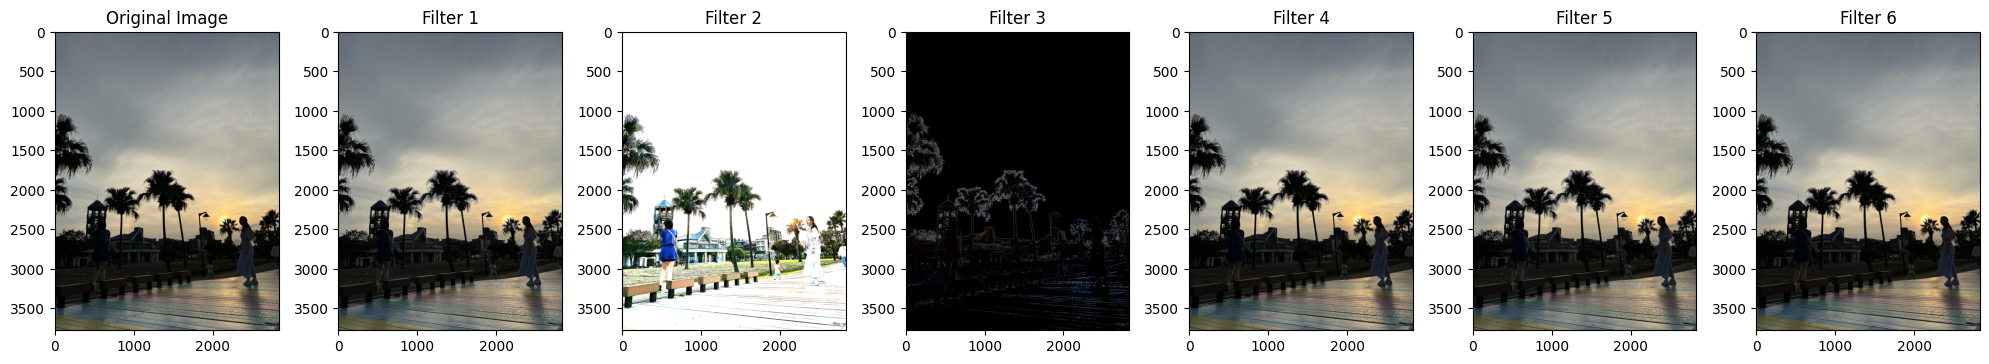

In [27]:
# 이미지 로드 (컬러로 로드)
image = cv2.imread(image_path)  # IMREAD_COLOR is default

def apply_filter_to_color_image(image, filter_):
    # 각 채널별로 필터 적용
    channels = cv2.split(image)
    filtered_channels = [cv2.filter2D(ch, -1, filter_) for ch in channels]
    return cv2.merge(filtered_channels)

# 필터 적용 및 결과 시각화
fig, axs = plt.subplots(1, len(filters) + 1, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
for idx, filter_ in enumerate(filters):
    filtered_image = apply_filter_to_color_image(image, filter_)
    axs[idx + 1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    axs[idx + 1].set_title(f"Filter {idx + 1}")

plt.tight_layout()
plt.show()